<a href="https://colab.research.google.com/github/jkcg-learning/PoseEstimation/blob/main/PoseEstimation_MMPose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Check nvcc version
!nvcc -V
# Check GCC version
!gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [2]:
!python --version

Python 3.7.12


In [3]:
!pip install torch==1.9.0+cu111 torchvision==0.10.0+cu111 torchaudio==0.9.0 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html


In [4]:
pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.9.0/index.html

Looking in links: https://download.openmmlab.com/mmcv/dist/cu111/torch1.9.0/index.html


In [5]:
!pip install mmdet

In [6]:
!git clone https://github.com/open-mmlab/mmpose.git


fatal: destination path 'mmpose' already exists and is not an empty directory.


In [7]:
%cd mmpose

/content/mmpose


In [8]:
!pwd

/content/mmpose


In [9]:
!pip install -r requirements.txt
!pip install -v -e .

Ignoring dataclasses: markers 'python_version == "3.6"' don't match your environment
  Cloning https://github.com/svenkreiss/poseval.git to /tmp/pip-install-vb6mrtfh/poseval_7084546b649c4acea6e0a19d27a338a0
  Running command git clone -q https://github.com/svenkreiss/poseval.git /tmp/pip-install-vb6mrtfh/poseval_7084546b649c4acea6e0a19d27a338a0
  Running command git submodule update --init --recursive -q
Using pip 21.1.3 from /usr/local/lib/python3.7/dist-packages/pip (python 3.7)
Value for scheme.platlib does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
Value for scheme.purelib does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
Value for scheme.headers does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: 

In [11]:
!pip uninstall opencv-python-headless

Found existing installation: opencv-python-headless 4.5.5.62
Uninstalling opencv-python-headless-4.5.5.62:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless-4.5.5.62.dist-info/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavcodec-64ac49e1.so.58.91.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavformat-4b79e479.so.58.45.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavutil-805734e8.so.56.51.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libbz2-a273e504.so.1.0.6
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libcrypto-018b8c17.so.1.1
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libgfortran-91cc3cb1.so.3.0.0
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libopenblas-r0-f650aae0.3.3.so
    /usr/local/lib/python3.7/dist

In [12]:
!pip install opencv-python-headless==4.1.2.30

     |████████████████████████████████| 21.8 MB 1.5 MB/s 


In [13]:
# Check Pytorch installation
import torch, torchvision
print('torch version:', torch.__version__, torch.cuda.is_available())
print('torchvision version:', torchvision.__version__)

# Check MMPose installation
import mmpose
print('mmpose version:', mmpose.__version__)

# Check mmcv installation
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print('cuda version:', get_compiling_cuda_version())
print('compiler information:', get_compiler_version())

torch version: 1.9.0+cu111 True
torchvision version: 0.10.0+cu111
mmpose version: 0.22.0
cuda version: 11.1
compiler information: GCC 7.3


load checkpoint from http path: https://download.openmmlab.com/mmpose/top_down/hrnet/hrnet_w48_coco_256x192-b9e0b3ab_20200708.pth


Downloading: "https://download.openmmlab.com/mmpose/top_down/hrnet/hrnet_w48_coco_256x192-b9e0b3ab_20200708.pth" to /root/.cache/torch/hub/checkpoints/hrnet_w48_coco_256x192-b9e0b3ab_20200708.pth


  0%|          | 0.00/243M [00:00<?, ?B/s]

load checkpoint from http path: https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth


Downloading: "https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth" to /root/.cache/torch/hub/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth


  0%|          | 0.00/160M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


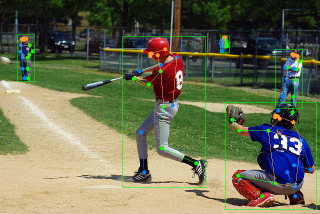

In [14]:
import cv2
from mmpose.apis import (inference_top_down_pose_model, init_pose_model,
                         vis_pose_result, process_mmdet_results)
from mmdet.apis import inference_detector, init_detector
local_runtime = False

try:
  from google.colab.patches import cv2_imshow  # for image visualization in colab
except:
  local_runtime = True

pose_config = 'configs/body/2d_kpt_sview_rgb_img/topdown_heatmap/coco/hrnet_w48_coco_256x192.py'
pose_checkpoint = 'https://download.openmmlab.com/mmpose/top_down/hrnet/hrnet_w48_coco_256x192-b9e0b3ab_20200708.pth'
det_config = 'demo/mmdetection_cfg/faster_rcnn_r50_fpn_coco.py'
det_checkpoint = 'https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

# initialize pose model
pose_model = init_pose_model(pose_config, pose_checkpoint)
# initialize detector
det_model = init_detector(det_config, det_checkpoint)

img = 'tests/data/coco/000000196141.jpg'

# inference detection
mmdet_results = inference_detector(det_model, img)

# extract person (COCO_ID=1) bounding boxes from the detection results
person_results = process_mmdet_results(mmdet_results, cat_id=1)

# inference pose
pose_results, returned_outputs = inference_top_down_pose_model(pose_model,
                                                               img,
                                                               person_results,
                                                               bbox_thr=0.3,
                                                               format='xyxy',
                                                               dataset=pose_model.cfg.data.test.type)

# show pose estimation results
vis_result = vis_pose_result(pose_model,
                             img,
                             pose_results,
                             dataset=pose_model.cfg.data.test.type,
                             show=False)
# reduce image size
vis_result = cv2.resize(vis_result, dsize=None, fx=0.5, fy=0.5)

if local_runtime:
  from IPython.display import Image, display
  import tempfile
  import os.path as osp
  with tempfile.TemporaryDirectory() as tmpdir:
    file_name = osp.join(tmpdir, 'pose_results.png')
    cv2.imwrite(file_name, vis_result)
    display(Image(file_name))
else:
  cv2_imshow(vis_result)


In [16]:
!python demo/top_down_video_demo_with_mmdet.py \
    demo/mmdetection_cfg/faster_rcnn_r50_fpn_coco.py \
    https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth \
    configs/body/2d_kpt_sview_rgb_img/topdown_heatmap/coco/hrnet_w48_coco_256x192.py \
    https://download.openmmlab.com/mmpose/top_down/hrnet/hrnet_w48_coco_256x192-b9e0b3ab_20200708.pth \
    --video-path demo/resources/demo.mp4 \
    --out-video-root vis_results

load checkpoint from http path: https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
load checkpoint from http path: https://download.openmmlab.com/mmpose/top_down/hrnet/hrnet_w48_coco_256x192-b9e0b3ab_20200708.pth
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [17]:
!python demo/top_down_img_demo.py \
    configs/body/2d_kpt_sview_rgb_img/topdown_heatmap/coco/hrnet_w48_coco_256x192.py \
    https://download.openmmlab.com/mmpose/top_down/hrnet/hrnet_w48_coco_256x192-b9e0b3ab_20200708.pth \
    --img-root tests/data/coco/ --json-file tests/data/coco/test_coco.json \
    --out-img-root vis_results

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
load checkpoint from http path: https://download.openmmlab.com/mmpose/top_down/hrnet/hrnet_w48_coco_256x192-b9e0b3ab_20200708.pth


In [18]:
!python demo/bottom_up_img_demo.py \
    configs/body/2d_kpt_sview_rgb_img/associative_embedding/coco/hrnet_w32_coco_512x512.py \
    https://download.openmmlab.com/mmpose/bottom_up/hrnet_w32_coco_512x512-bcb8c247_20200816.pth \
    --img-path tests/data/coco/ \
    --out-img-root vis_results

load checkpoint from http path: https://download.openmmlab.com/mmpose/bottom_up/hrnet_w32_coco_512x512-bcb8c247_20200816.pth
Downloading: "https://download.openmmlab.com/mmpose/bottom_up/hrnet_w32_coco_512x512-bcb8c247_20200816.pth" to /root/.cache/torch/hub/checkpoints/hrnet_w32_coco_512x512-bcb8c247_20200816.pth
100% 109M/109M [00:14<00:00, 7.78MB/s]
[                                                  ] 0/4, elapsed: 0s, ETA:/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently

In [19]:
!python demo/top_down_pose_tracking_demo_with_mmtracking.py \
    demo/mmtracking_cfg/tracktor_faster-rcnn_r50_fpn_4e_mot17-private.py \
    configs/body/2d_kpt_sview_rgb_img/topdown_heatmap/coco/res50_coco_256x192.py \
    https://download.openmmlab.com/mmpose/top_down/resnet/res50_coco_256x192-ec54d7f3_20200709.pth \
    --video-path demo/resources/demo.mp4 \
    --out-video-root vis_results

Traceback (most recent call last):
  File "demo/top_down_pose_tracking_demo_with_mmtracking.py", line 185, in <module>
    main()
  File "demo/top_down_pose_tracking_demo_with_mmtracking.py", line 82, in main
    assert has_mmtrack, 'Please install mmtrack to run the demo.'
AssertionError: Please install mmtrack to run the demo.


In [20]:
!python demo/bottom_up_pose_tracking_demo.py \
    configs/body/2d_kpt_sview_rgb_img/associative_embedding/coco/hrnet_w32_coco_512x512.py \
    https://download.openmmlab.com/mmpose/bottom_up/hrnet_w32_coco_512x512-bcb8c247_20200816.pth \
    --video-path demo/resources/demo.mp4 \
    --out-video-root vis_results

load checkpoint from http path: https://download.openmmlab.com/mmpose/bottom_up/hrnet_w32_coco_512x512-bcb8c247_20200816.pth
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /pytorch/aten/src